# Trantando Dados

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('carros_sp.csv')

In [3]:
dataset.head()

,modelo,marca,combustivel,cambio,direcao,cor,ano,quilometragem,potenciamotor,blindado,valor
0,3345,60,4,0,1,0,2019,28000,1.4,0,98900.0
1,2578,42,4,0,2,7,2017,44000,1.6,0,60890.0
2,4049,8,4,2,2,9,2017,66000,1.0,0,27990.0
3,1435,73,4,2,2,9,2016,100000,1.0,0,47900.0
4,3095,73,4,0,2,2,2016,70000,1.0,0,44890.0


In [4]:
anos = dataset['ano']
anos.drop_duplicates()

0    2019
1    2017
3    2016
5    2015
6    2018
Name: ano, dtype: int64

In [5]:
marcas = dataset.groupby('marca')
len(marcas)

38

In [6]:
marcas['valor'].aggregate(['min', 'max'])

,min,max
marca,,
4,30900.0,49990.0
5,21000.0,114990.0
7,60000.0,405900.0
8,10000.0,619900.0
11,23000.0,98000.0
12,1120.0,919003.0
13,79990.0,250000.0
16,73984.0,165900.0
18,93800.0,199000.0


<AxesSubplot:>

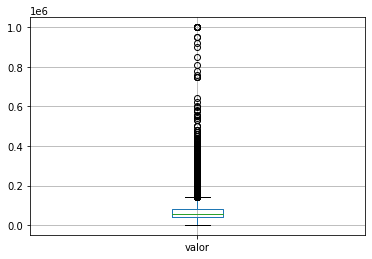

In [7]:
dataset.boxplot(['valor'])

In [8]:
valor = dataset['valor']
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
IIQ = q3 - q1
limite_inferior = q1 - 1.5 * IIQ
limite_superior = q3 + 1.5 * IIQ

In [9]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dataset_new = dataset[selecao]

<AxesSubplot:>

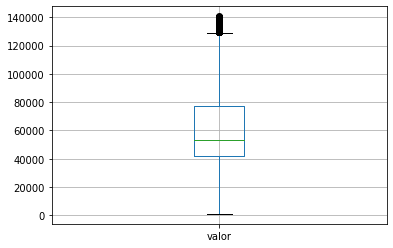

In [10]:
dataset_new.boxplot(['valor'])

array([[<AxesSubplot:title={'center':'valor'}>]], dtype=object)

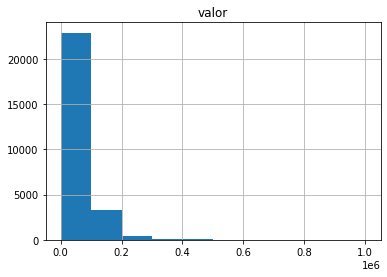

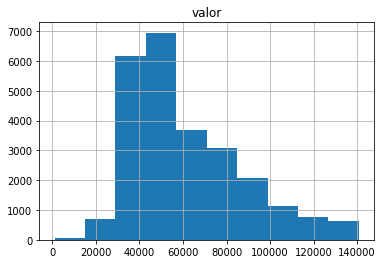

In [11]:
dataset.hist(['valor'])
dataset_new.hist(['valor'])

In [12]:
modelos = dataset.groupby('modelo')['valor']
q1 = modelos.quantile(.25)
q3 = modelos.quantile(.75)
IIQ = q3 - q1
limite_inferior = q1 - 1.5 * IIQ
limite_superior = q3 + 1.5 * IIQ

<AxesSubplot:title={'center':'valor'}, xlabel='[modelo]'>

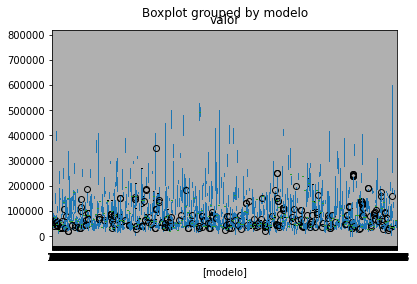

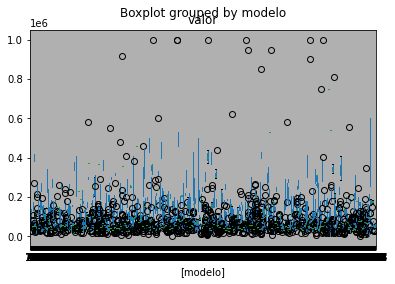

In [13]:
dados_new = pd.DataFrame()

for tipo in modelos.groups.keys():
    eh_tipo = dataset['modelo'] == tipo
    eh_dentro_limite = (dataset['valor'] >= limite_inferior[tipo]) & (dataset['valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dataset[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])
    
dados_new.boxplot(['valor'], by=['modelo'])
dataset.boxplot(['valor'], by=['modelo'])

<AxesSubplot:title={'center':'valor'}, xlabel='[modelo]'>

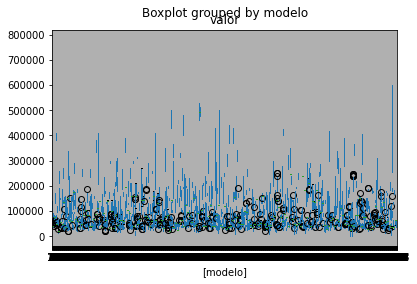

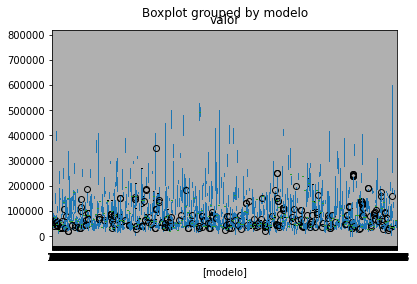

In [15]:
quilometragem = dados_new.groupby('modelo')['quilometragem']
q1 = quilometragem.quantile(.25)
q3 = quilometragem.quantile(.75)
IIQ = q3 - q1
limite_inferior = q1 - 1.5 * IIQ
limite_superior = q3 + 1.5 * IIQ

quilometragem_new = pd.DataFrame()

for tipo in quilometragem.groups.keys():
    eh_tipo = dados_new['modelo'] == tipo
    eh_dentro_limite = (dados_new['quilometragem'] >= limite_inferior[tipo]) & (dados_new['quilometragem'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados_new[selecao]
    quilometragem_new = pd.concat([quilometragem_new, dados_selecao])
    
quilometragem_new.boxplot(['valor'], by=['modelo'])
dados_new.boxplot(['valor'], by=['modelo'])

<AxesSubplot:title={'center':'quilometragem'}, xlabel='[modelo]'>

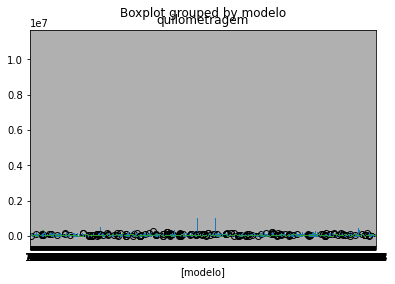

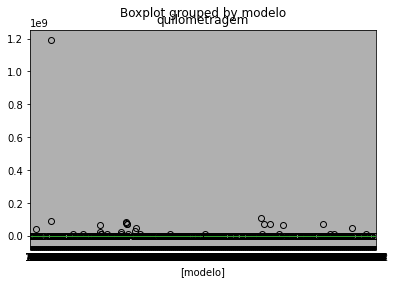

In [16]:
quilometragem_new.boxplot(['quilometragem'], by=['modelo'])
dados_new.boxplot(['quilometragem'], by=['modelo'])

In [17]:
quilometragem_new.to_csv('carros_sp_sem_outliers.csv', index=False)

In [18]:
dados = pd.read_csv('carros_sp_sem_outliers.csv')
dados.head()

,modelo,marca,combustivel,cambio,direcao,cor,ano,quilometragem,potenciamotor,blindado,valor
0,1,12,5,0,2,9,2018,49906,2.0,0,150900.0
1,3,30,6,0,2,3,2017,25000,2.0,0,283000.0
2,5,65,5,0,2,0,2017,137000,3.0,0,139000.0
3,5,65,5,0,2,0,2016,108900,3.0,0,128900.0
4,5,65,5,0,2,7,2015,89000,3.0,0,124499.0


In [19]:
group_model = dados.groupby('modelo')


In [20]:
df_models = []
for modelo, data in group_model:
    print(modelo)
    df_models.append(pd.DataFrame(data))

1
3
5
7
9
10
14
17
19
22
23
33
37
38
43
45
52
53
54
55
56
58
60
61
62
70
71
74
75
76
77
80
83
84
85
87
88
91
93
95
102
103
104
105
109
110
111
115
118
119
120
121
123
124
125
126
129
130
134
138
145
148
150
155
163
164
170
176
177
180
181
184
186
188
193
195
202
203
204
206
208
212
216
217
220
221
222
223
228
229
234
235
240
241
242
243
247
248
250
252
257
260
265
268
270
273
275
291
293
297
298
299
300
301
303
304
309
310
317
318
319
320
321
322
323
324
325
326
327
329
330
332
335
336
338
340
341
345
348
350
353
357
358
364
365
369
373
375
377
378
380
381
382
384
386
387
393
397
401
403
406
407
408
410
413
415
422
423
427
430
432
434
436
437
440
441
442
443
444
445
446
447
449
453
457
458
460
462
463
464
466
469
470
472
475
476
477
478
481
485
488
491
493
494
497
498
501
507
508
513
514
520
524
530
531
532
534
540
541
544
546
548
551
553
554
560
563
564
566
573
574
575
576
578
585
586
588
592
593
597
599
600
601
604
607
612
614
615
616
617
619
620
622
623
628
629
631
633
635
638
646
6

In [23]:
#for marca, data in df_models:
    #print(marca)

ValueError: too many values to unpack (expected 2)

In [21]:
#df_brands[24].to_csv('vw_sp.csv', index=False)

NameError: name 'df_brands' is not defined

In [26]:
temp = []
for i in range(len(df_models)):
    #df_models[i].to_csv('vw_sp.csv', index=False)
    df = df_models[i]
    temp.append(df.shape[0])

temp = np.asarray(temp)

In [40]:
for i in range(len(temp)):    
    if temp[i]>200:
        print(i, " - ", temp[i])

387  -  401
528  -  208
622  -  362
981  -  309
1649  -  454
1674  -  537


In [31]:
df_models[1674].to_csv('ka.csv', index=False)

In [33]:
media = np.asarray(df_models[1674]['valor'])

In [34]:
media.mean()

40227.55679702049